In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import draw
from skimage import io
from skimage.util import crop
import time

In [13]:
# random.seed(42)

In [14]:
# img = io.imread('../../ACE/ImageNet/ILSVRC2012_img_train/n01531178/n01531178_278.JPEG')

# io.imsave('../images/reference_image.jpg',img)

In [15]:
# From input image
# dpi = 72

In [16]:

# height, width, _ = img.shape
# R = 100 # Radius
# previous_heights = []
# previous_widths = []

In [17]:
# mask1 = draw.circle(100, 350, R)
# mask2 = draw.circle(250, 200, R)

# fig, ax = plt.subplots(figsize=((img.shape[1]/dpi),(img.shape[0]/dpi)), dpi=dpi)
# ax.imshow(img)
# ax.plot(mask1[1], mask1[0], 'black', lw=1)
# ax.plot(mask2[1], mask2[0], 'black', lw=1)
# ax.axis('off')

# fig.tight_layout(pad=0.01)
# plt.savefig(f'../images/test_mask_custom.jpg')

# plt.show()

In [18]:
# # Input image
# image = io.imread('../../ACE/ImageNet/ILSVRC2012_img_train/n01531178/n01531178_278.JPEG') / 255.

# background_height, background_width, background_depth = image.shape
# background = np.zeros((background_height, background_width, background_depth))

# R = 100

# xcoords = [100, 350]
# ycoords = [200, 50]

# def plot_image_features(x, y, R, background):
#     pass

# for x, y in zip(xcoords, ycoords):

#     cropped_image = crop(image, ((y,(background_height - y - 2*R)),(x,(background_width - x - 2*R)),(0,0)))    
#     cropped_image_height, cropped_image_width, cropped_image_depth = cropped_image.shape

#     # Produce circular image feature only
#     X, Y = np.ogrid[:cropped_image_width, :cropped_image_height]
#     outer_disk_mask = (X - cropped_image_width / 2)**2 + (Y - cropped_image_height / 2)**2 > (cropped_image_width / 2)**2
#     cropped_image[outer_disk_mask] = 0

#     background[y : y + cropped_image_height, x : x + cropped_image_width, :] = cropped_image
#     background = background[:,:,:3] * (1. - background) + background[:,:,:3] * background

# fig, ax = plt.subplots()
# ax.imshow(background)
# fig.tight_layout(pad=0.01)
# ax.set_xticks([]), ax.set_yticks([])
# ax.axis([0, background.shape[1], background.shape[0], 0])
# plt.savefig(f'../images/test_combined_features.jpg')
# plt.show()


In [19]:
# R = 100

# # Could repeat this multiple times
# def get_mask_coords():
    
#     mask_height = random.randint(0,height-R)
#     mask_width = random.randint(0,width-R)

#     if mask_height in previous_heights or mask_width in previous_widths:
#         get_mask_coords()
#     else:
#         previous_heights.append(mask_height)
#         previous_widths.append(mask_width)
#         return mask_height, mask_width

# for i in range(1):
#     try:
#         mask_height, mask_width = get_mask_coords()
#     except TypeError:
#         break

#     mask = draw.rectangle((mask_height,mask_width), extent=(R,R))

#     fig, ax = plt.subplots()
#     ax.imshow(img)
#     ax.plot(mask[1], mask[0], 'black', lw=1)
#     ax.set_xticks([]), ax.set_yticks([])
#     ax.axis([0, img.shape[1], img.shape[0], 0])
    
#     fig.tight_layout(pad=0.05)
#     # plt.savefig(f'../images/test_mask_{i}.jpg')
#     plt.show()

In [27]:
# (height, width, channel)
# img.shape

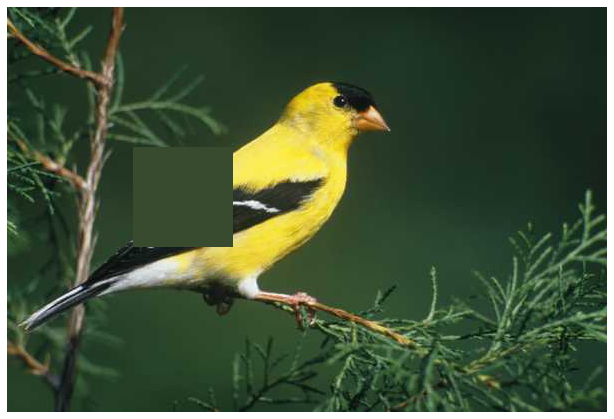

In [31]:
# random.seed(42)

# IMG = io.imread('../../ACE/ImageNet/ILSVRC2012_img_train/n01531178/n01531178_278.JPEG')
# HEIGHT, WIDTH, _ = IMG.shape
# DPI = 72

# MASK_SIZE = 100
# MAX_MASKS = (IMG.shape[0]*IMG.shape[1])/ (MASK_SIZE**2)

# execution_times = []

# # Mask colour
# mean_r_channel = np.mean([item[0]/255 for sublist in IMG for item in sublist])
# mean_g_channel = np.mean([item[1]/255 for sublist in IMG for item in sublist])
# mean_b_channel = np.mean([item[2]/255 for sublist in IMG for item in sublist])

# mask_colour = [mean_r_channel, mean_g_channel, mean_b_channel]

# start = time.time()

# # return (mask_y_min, mask_x_min)
# coords = 140, 125
# mask = draw.rectangle((coords[0],coords[1]), extent=(MASK_SIZE,MASK_SIZE))

# fig, ax = plt.subplots(figsize=((IMG.shape[1]/DPI),(IMG.shape[0]/DPI)), dpi=DPI)
# ax.imshow(IMG)
# ax.plot(mask[1], mask[0], color=mask_colour, lw=1)
# ax.axis('off')

# # plt.tight_layout(pad=-0.001)
# plt.tight_layout(pad=0)
# plt.savefig(f'../images/test_mask_blah.jpg')
# end = time.time() 
# execution_times.append(end - start)

In [41]:
random.seed(42)

IMG = io.imread('../../ACE/ImageNet/ILSVRC2012_img_train/n01531178/n01531178_278.JPEG')
HEIGHT, WIDTH, _ = IMG.shape
DPI = 72

MAX_SEARCHES = 10
MASK_SIZE = 100
# MAX_MASKS = (IMG.shape[0]*IMG.shape[1])/ (MASK_SIZE**2)

execution_times = []

# Mask colour
mean_r_channel = np.mean([item[0]/255 for sublist in IMG for item in sublist])
mean_g_channel = np.mean([item[1]/255 for sublist in IMG for item in sublist])
mean_b_channel = np.mean([item[2]/255 for sublist in IMG for item in sublist])

mask_colour = [mean_r_channel, mean_g_channel, mean_b_channel]

def get_mask_coords(CURRENT_SEARCHES):

    global MAX_SEARCHES
    
    MASK_OVERLAP_PREVIOUS = False
    mask_y_min = random.randint(0,HEIGHT-MASK_SIZE)
    mask_x_min = random.randint(0,WIDTH-MASK_SIZE)

    mask_y_coords = [i for i in range(mask_y_min,mask_y_min+MASK_SIZE)]
    mask_x_coords = [i for i in range(mask_x_min,mask_x_min+MASK_SIZE)]
    mask_coords = [coord for coord in itertools.product(*[mask_y_coords,mask_x_coords])]

    for (y, x) in mask_coords:
        if (y, x) in previous_mask_coords:
            MASK_OVERLAP_PREVIOUS = True
            break

    if MASK_OVERLAP_PREVIOUS == True:
        CURRENT_SEARCHES += 1
        if CURRENT_SEARCHES < MAX_SEARCHES:
            return get_mask_coords(CURRENT_SEARCHES)
        else:
            return None
    else:
        previous_mask_coords.extend(mask_coords)
        return (mask_y_min, mask_x_min)

for iteration in range(100):
    
    previous_mask_coords = []

    # for i in range(int(np.floor(MAX_MASKS))):
    for i in range(1,11):

        start = time.time()

        CURRENT_SEARCHES = 0

        coords = get_mask_coords(CURRENT_SEARCHES)

        if not coords:
            break

        mask = draw.rectangle((coords[0],coords[1]), extent=(MASK_SIZE,MASK_SIZE))

        fig, ax = plt.subplots(figsize=((IMG.shape[1]/DPI),(IMG.shape[0]/DPI)), dpi=DPI)
        ax.imshow(IMG)
        ax.plot(mask[1], mask[0], color=mask_colour, lw=1)
        ax.axis('off')
        
        plt.tight_layout(pad=0)
        plt.savefig(f'../images/test_mask_y_min_{coords[0]}_x_min_{coords[1]}_mask_no_{iteration*10+i}.jpg')
        end = time.time()
        execution_times.append(end - start)

KeyboardInterrupt: 

In [ ]:
print(f"Total execution time: {np.sum(execution_times)}")
print(f"Average execution time: {np.mean(execution_times)}")